<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/Automatic-Street-Light/blob/main/Alzheimer_MRI_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Alzheimer’s Disease Stage Classification using Deep Learning

This project uses brain MRI scans to classify patients into four categories based on Alzheimer's disease progression:

- 0: Mild Demented  
- 1: Moderate Demented  
- 2: Non Demented  
- 3: Very Mild Demented  

We'll build a deep learning model to automate this classification using `.parquet` image data and PyTorch.


In [1]:
!pip install pandas pyarrow


## 📂 Load the Dataset

We load the training and testing datasets using `pandas.read_parquet()`, since our data is stored in `.parquet` format. Each row contains:

- `image`: stored as a dictionary of bytes  
- `label`: category (0 to 3)

We inspect the structure to verify data integrity.


In [3]:
import pandas as pd

# Loading the datasets
train_df = pd.read_parquet('/content/train-00000-of-00001-c08a401c53fe5312.parquet')
test_df = pd.read_parquet('/content/test-00000-of-00001-44110b9df98c5585.parquet')


print(train_df.shape)
print(train_df.columns)
train_df.head()


(5120, 2)
Index(['image', 'label'], dtype='object')


,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:

print(type(train_df.iloc[0]['image']))
print(train_df.iloc[0]['image'])


<class 'dict'>
{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xc0\x00\x0b\x08\x00\x80\x00\x80\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x05\x06\x08\x04\x02\x03\x01\t\xff\xc4\x008\x10\x00\x01\x03\x03\x03\x02\x05\x03\x01\x05\x08\x03\x00\x00\x00\x00\x01\x02\x03\x04\x00\x05\x11\x06\x07\x12!1\x13"AQa\x142q\x81\x08\x15R\x91\xa1#$3Bb\x92\xb1\xd1\x16r\x82\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xfeUQE\x14QE\x14QE\x14QE\x14QE\x14W\xea\x1bS\x8bJ\x12\x92\xa5(\xe0$\x0c\x92\x7f\x157\x07BjK\x9a\x1c\\;\x05\xceRZ\xfb\xd4\xd4G\x14\x13\xf9\xc0\xe9\xd8\xd4l\xfbL\xdbZ\xf8\xcc\x86\xfcU{<\xd9G\xcf\xadu\xda\xb4\x95\xee\xfaH\xb6\xd9\xe7O\xc63\xf4\xd1\x96\xe6

## 🖼️ Visualize a Sample MRI Image

We use Python Imaging Library (PIL) to convert the image bytes into displayable images. This helps us confirm that the MRI scans are loading correctly and the labels are valid.


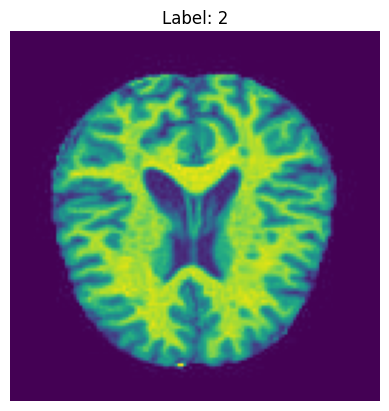

In [6]:
from PIL import Image
import io
import matplotlib.pyplot as plt

# Access the image bytes
image_bytes = train_df.iloc[0]['image']['bytes']
label = train_df.iloc[0]['label']

# Convert bytes to image
image = Image.open(io.BytesIO(image_bytes))

# Display
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


## 🧼  Define Image Preprocessing

Before feeding images into a deep learning model, we must preprocess them:
- **Resize** all images to 224x224 (standard input size)
- **Convert to tensor** to work with PyTorch
- **Normalize** pixel values to the range [-1, 1] for faster training convergence


```
# This is formatted as code
```



In [8]:
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [10]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


## 🧱 Create a PyTorch Dataset Class

PyTorch requires data to be wrapped in a `Dataset` class so it can load data efficiently during training. This class:

- Reads images and labels from our DataFrame
- Applies our transformations (resize, normalize)
- Returns one image-label pair at a time


In [47]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class AlzheimerMRIDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_bytes = self.df.iloc[idx]['image']['bytes']
        label = self.df.iloc[idx]['label']
        image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


## 🧺 Load Data in Batches (DataLoaders)

We use PyTorch `DataLoader` to load the data in mini-batches for training. This helps improve speed and efficiency. Shuffling is applied to the training data for better learning.


In [14]:
from torch.utils.data import DataLoader

# Create dataset objects
train_dataset = AlzheimerMRIDataset(train_df, transform=transform)
test_dataset = AlzheimerMRIDataset(test_df, transform=transform)

# Create DataLoader objects for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [13]:
images, labels = next(iter(train_loader))
print(images.shape)  # torch.Size([32, 3, 224, 224])
print(labels)


torch.Size([32, 3, 224, 224])
tensor([3, 2, 0, 3, 2, 0, 3, 3, 2, 2, 2, 3, 3, 2, 2, 0, 0, 2, 3, 2, 2, 2, 2, 0,
        3, 3, 3, 2, 2, 3, 0, 2])


# Building a sample CNN Model

In [51]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)   # Input: 3 channels (RGB), Output: 16 feature maps
        self.pool = nn.MaxPool2d(2, 2)                            # Downsample by 2x
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(64 * 28 * 28, 128)                   # Flattened layer after convs
        self.fc2 = nn.Linear(128, 4)                              # 4 classes for Alzheimer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 + ReLU + Pool

        x = x.view(-1, 64 * 28 * 28)          # Flatten before FC
        x = F.relu(self.fc1(x))               # FC1 + ReLU
        x = self.fc2(x)                       # Output layer (logits)
        return x


In [16]:
model = SimpleCNN()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [17]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()                           # Set model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward + optimize
        optimizer.zero_grad()             # Clear gradients
        loss.backward()                   # Backpropagation
        optimizer.step()                  # Update weights

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")



Epoch [1/5], Loss: 0.9903
Epoch [2/5], Loss: 0.7586
Epoch [3/5], Loss: 0.3584
Epoch [4/5], Loss: 0.1318
Epoch [5/5], Loss: 0.0407


In [29]:
train_accuracy = []
train_loss = []

num_epochs = 5  # or whatever value you are using

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    train_loss.append(epoch_loss)
    train_accuracy.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


Epoch [1/5], Loss: 0.0146, Accuracy: 99.67%
Epoch [2/5], Loss: 0.0212, Accuracy: 99.28%
Epoch [3/5], Loss: 0.0086, Accuracy: 99.79%
Epoch [4/5], Loss: 0.0067, Accuracy: 99.75%
Epoch [5/5], Loss: 0.0320, Accuracy: 98.93%


In [30]:
def test_model(model, test_loader):
    model.eval()  # Evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No gradient calculation for testing
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

test_model(model, test_loader)


Test Accuracy: 96.95%


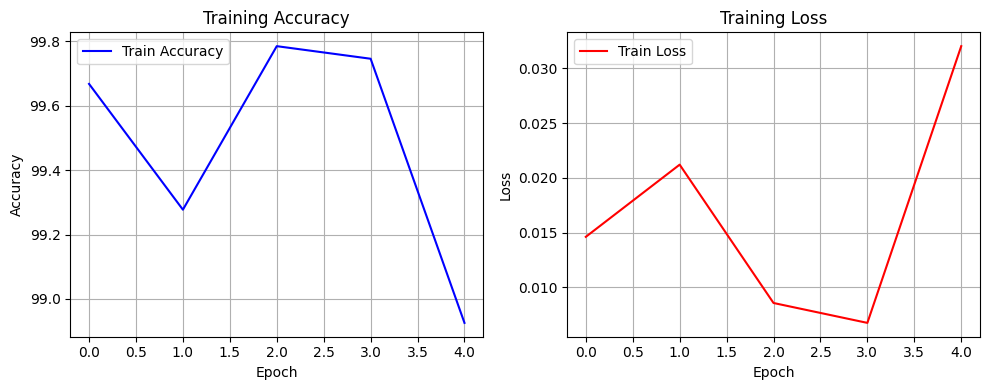

In [31]:
import matplotlib.pyplot as plt

# Plot Training Accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid(True)
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 96.95%


Got a very good accuracy of 96.95% in the testing dataset, we will try to alter the epochs and see how it affects, and also owill go for data augmentation

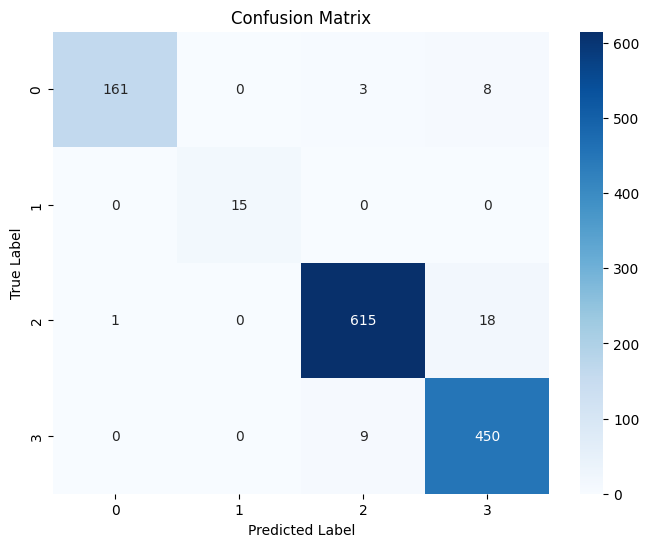

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gather all true and predicted labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn.metrics import classification_report

# Generate report
report = classification_report(all_labels, all_preds, digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.9938    0.9360    0.9641       172
           1     1.0000    1.0000    1.0000        15
           2     0.9809    0.9700    0.9754       634
           3     0.9454    0.9804    0.9626       459

    accuracy                         0.9695      1280
   macro avg     0.9800    0.9716    0.9755      1280
weighted avg     0.9701    0.9695    0.9696      1280



In [35]:
torch.save(model.state_dict(), 'cnn_model_weights.pth')
#to reload
#model.load_state_dict(torch.load('cnn_model_weights.pth'))
#model.eval()

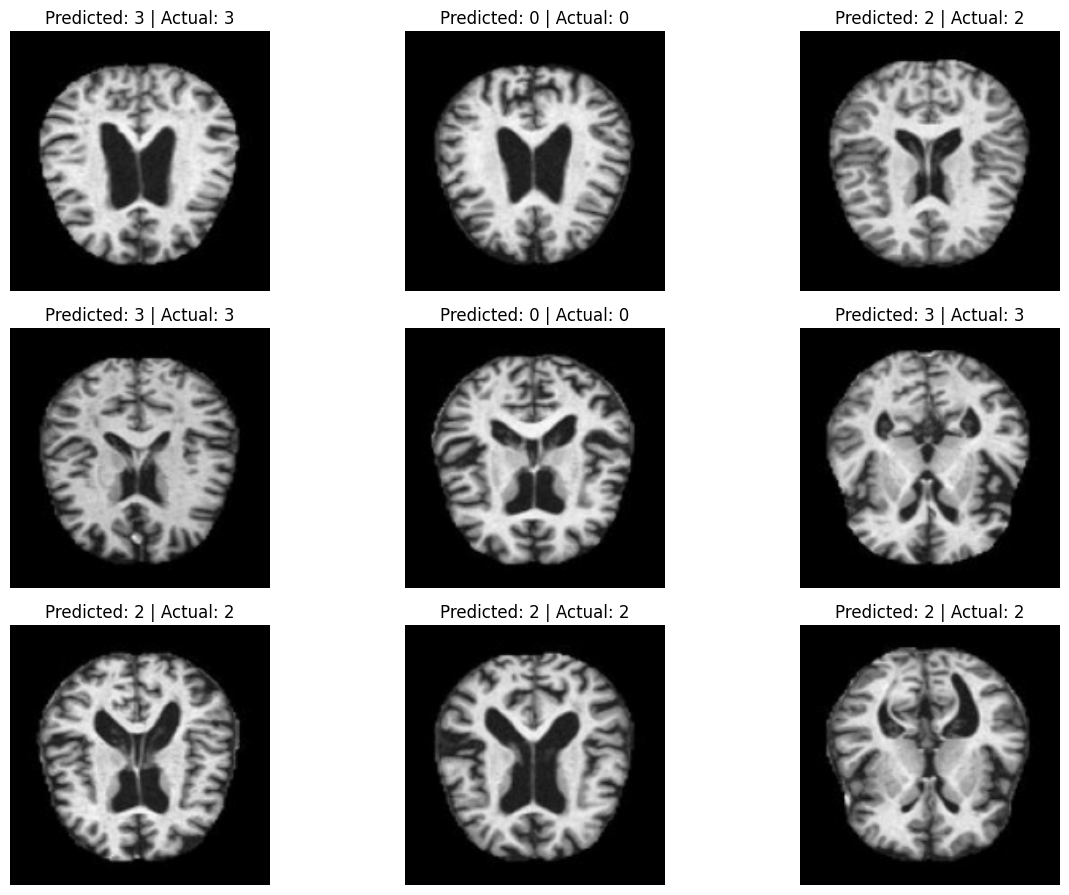

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Put model in eval mode
model.eval()

# Get a batch from test_loader
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Move images to device if using CUDA
images = images.to(device)
labels = labels.to(device)

# Get predictions
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Show a few images
def imshow(img, title):
    img = img.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Display 6 predictions
plt.figure(figsize=(12, 15))
for i in range(9):
    plt.subplot(5, 3, i+1)
    imshow(images[i], f'Predicted: {preds[i].item()} | Actual: {labels[i].item()}')
plt.tight_layout()
plt.show()

Tried for epochs=1, taking lot of time, and looked overfitting, as was reaching 100% accuracy in the first epoch itself.

#DATA AUGMENTATION

In [72]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCC1(nn.Module):  # renamed to avoid conflict
    def __init__(self):
        super(SimpleCC1, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # <- changed from 3 to 1 channel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(64 * 3 * 3, 128)  # <- Changed from 64*28*28 to correct flattened size
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [B, 16, 14, 14]
        x = self.pool(F.relu(self.conv2(x)))  # [B, 32, 7, 7]
        x = self.pool(F.relu(self.conv3(x)))  # [B, 64, 3, 3]

        x = x.view(-1, 64 * 3 * 3)            # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [73]:
from torchvision import transforms

# Augmented training transform
train_transform_augmented = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Same test transform as before (no augmentation here)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


In [74]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Datasets with new transform
train_dataset_augmented = MNIST(root='./data', train=True, transform=train_transform_augmented, download=True)
test_dataset = MNIST(root='./data', train=False, transform=test_transform)

# DataLoaders
train_loader_augmented = DataLoader(train_dataset_augmented, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [75]:

import torch.nn as nn
import torch.optim as optim
aug_model = SimpleCC1()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

cpu


In [ ]:
num_epochs = 5
train_accuracy = []
train_loss = []

for epoch in range(num_epochs):
    aug_model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader_augmented:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = aug_model(images)
        loss = criterion(outputs, labels)

        # Backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(outputs, 1)      # Get predicted class
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader_augmented)
    epoch_acc = 100 * correct / total

    train_loss.append(epoch_loss)
    train_accuracy.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


Epoch [1/5], Loss: 2.3030, Accuracy: 10.61%
